# Getting Started with AnyPyTools

## Running a simple macro

<img src="Tutorial files/knee.gif" alt="Drawing" align="Right" style="height: 120px;"/>

For the sake of the tutorial we will use a small 'toy' model of a simplified knee joint (see the figure.) The model is defined in the file [Knee.any](Knee.any), which is placed in the current working directory.

Next, let us run the model from python. First, we import the `AnyPyProcess` class and create an instance of the class.
 

In [1]:
from anypytools import AnyPyProcess 
app = AnyPyProcess()

Next, we need to instruct the AnyBody Modelling System to load the and run the model. We do this using _AnyScript_ macro commands. These are short commands that can automate operations in the AnyBody Modeling System (AMS). Operation that are normally done by pointing and clicking in the AMS graphical user interface. 

You can read more on _AnyScript_ macros in the "User Interface Features" tutorial that accompanies the AnyBody Modeling System.

Now we define an _AnyScript_ macro that we want to run on the model.

```
load "Knee.any"
operation Main.MyStudy.Kinematics
run
```

The macro will command AnyBody to load the model and run the Kinematics operation. 

The macro is executed by parsing it to the `start_macro()` method of the `AnyPyProcess` object.

In [2]:
macrolist = [
    'load "Knee.any"',
    'operation Main.MyStudy.Kinematics',
    'run',
]

app.start_macro(macrolist);

## Running multiple macros

It is easy to run multiple macros by adding an extra set of macro commands to the macro list.

In [4]:
macrolist = [
    ['load "Knee.any"',
     'operation Main.MyStudy.Kinematics',
     'run'],
    ['load "Knee.any"',
     'operation Main.MyStudy.InverseDynamics',
     'run'],
]
app.start_macro(macrolist);

## Parallel execution

Notice that AnyPyProcess will run the anyscript macros in parallel. Modern computers have multiple cores, but a single AnyBody instance can only utilize a single core, leaving us with a great potential for speeding things up through parallelization.

To test this, let us create ten macros in a for-loop. 

In [5]:
macrolist = []
for i in range(40):
    macro = [
        'load "Knee.any"',              
        'operation Main.MyStudy.InverseDynamics',
        'run',
    ]
    macrolist.append(macro)

AnyPyProcess has a parameter 'num_processes' that controls the number of parallel processes. Let us try a small example to see the difference in speed:

In [5]:
# First sequentially
app = AnyPyProcess(num_processes = 1)
app.start_macro(macrolist);

In [6]:
# Then with parallization
app = AnyPyProcess(num_processes = 4)
app.start_macro(macrolist);

*Note*: In general you should not user a `num_processes` larger than the number of cores in your computer.

## Getting data from the AnyBody Model

In the following macro, we have added a new class operation to 'Dump' the result of the maximum muscle activity. The `start_macro` method will return all the dumped variables:

In [6]:
macrolist = [
    'load "Knee.any"',
    'operation Main.MyStudy.InverseDynamics',
    'run',
    'classoperation Main.MyStudy.Output.MaxMuscleActivity "Dump"',
] 

results = app.start_macro(macrolist)
results

[{'Main.MyStudy.Output.MaxMuscleActivity': 
    array([ 0.00890538,  0.00927552,  0.00986515,  0.01067729,  0.01171374,
            0.01297502,  0.01446022,  0.0161669 ,  0.01809102,  0.02022675,
            0.02256637,  0.02510015,  0.0278161 ,  0.03069982,  0.03373426,
            0.0368995 ,  0.0401725 ,  0.04352691,  0.04693299,  0.05035756,
            0.05376422,  0.05711384,  0.06036528,  0.06347664,  0.06640681,
            0.0691175 ,  0.07157552,  0.07375524,  0.07564093,  0.07722862,
            0.07852727,  0.0795589 ,  0.08035747,  0.08096676,  0.0814373 ,
            0.08182288,  0.0821771 ,  0.08255065,  0.08298457,  0.08333915,
            0.08355467,  0.08365939,  0.08367977,  0.08364023,  0.08356287,
            0.08346721,  0.08336996,  0.08328478,  0.08322211,  0.083189  ,
            0.083189  ,  0.08322211,  0.08328478,  0.08336996,  0.08346721,
            0.08356287,  0.08364023,  0.08367977,  0.08365939,  0.08355467,
            0.08333915,  0.08298458,  0.0825

We can export more variables by adding more `classoperation`. But there is a better way of doing this, as we shall see in the next tutorials. 

Finally, to make a plot we import the `matplotlib` library, and enable inline figures.

In [8]:
max_muscle_act = results[0]['Main.MyStudy.Output.MaxMuscleActivity']

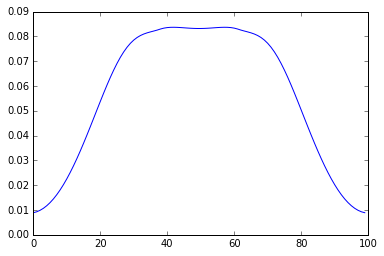

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(max_muscle_act );